<center> <font size = '4'> <b>Hello World of Deep Learning</b> </font></center>

In this tutorial, we use deep learning techniques to learn the parameters of a quadratic function. We will use a mean squared error as the loss function and use backpropagation to find the best fitting parameters of the model. We will do this using three methods.

1) <a href = '#section1'> Numpy </a>

2) <a href = '#section2'> Tensorflow functional api </a>

3) <a href = '#section3'> Tensorflow sequential api </a>


<a id = 'section1'></a>

<b> Numpy </b>

In [418]:
#first import required libraries
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('retina')


In [419]:
#build the model class
class Model():
    
    def __init__(self):
        
        #assign the initial variables
        self.a = 15
        self.b = -2
        self.c = 10
        
    def __call__(self, x):
        
        return self.a * (x)**2 + self.b * x + self.c

#initialize the model
model = Model()

#print the initial parameter values
print('Initial parameter "a" value: ', model.a)
print('Initial parameter "b" value: ', model.b)
print('Initial parameter "c" value: ', model.c)

Initial parameter "a" value:  15
Initial parameter "b" value:  -2
Initial parameter "c" value:  10


Now let's synthesize data. We will use parameters 3, 1 and 4 for a, b and c respectively. We will use the quadratic function $a x^2 + b x + c$ to synthesize data.

In [420]:
#synthasize data
true_a = 10
true_b = 5
true_c = 12

#number of examples
num_examples = 1000

#create x and y data
x = np.random.normal(0, 1, num_examples)
y = true_a * np.square(x) + true_b * x + true_c

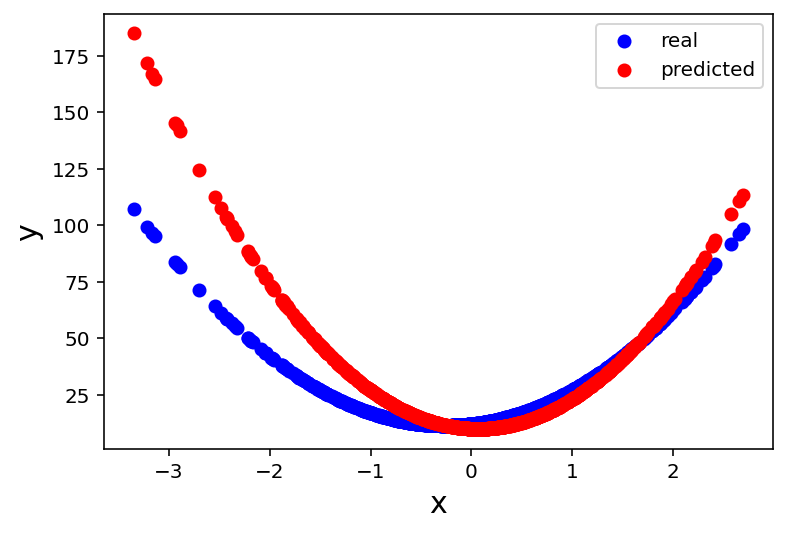

In [421]:
#create function to plot data
def plot_data(inputs, outputs, predictions, figsize = None):
    
    if figsize:
        plt.figure(figsize = figsize) 
    
    plt.scatter(inputs, outputs, color = 'b')
    plt.scatter(inputs, predictions, color = 'r')
    plt.legend(['real', 'predicted'])
    plt.xlabel('x', fontsize = '15')
    plt.ylabel('y', fontsize = '15')
    plt.show()
    
#plot the current data
plot_data(x, y, model(x))

In the plot the blue graph represents the true data. These true data is generated by the function $10x^2 + 5x + 12$. The red plot is another quadratic function with different parameters. ($ax^2 + bx + c$ where a, b and c are randomly initialized as 3, 1 and 2). The goal is to use deep learning to fit the synthesized data to the true data. In order to do this we will have to use a method that gets our parameter values a, b and c as close as possible to 10, 5 and 12. Let's see how we can do this by deep learning. (Note that quadratic equations have a closed form solution and we don't have to use deep learning to find solutions)


Back propagation to calculate the gradients. 
.

.

.

.

.

.

.


In [422]:
#create a loss function. will use mean squared error
def loss(y_predicted, y_true):
    
    return np.mean(np.square(y_predicted - y_true))

#let's use backpropagation to calculate the loss
def grads(inputs, outputs, predictions):
    
    #calculate dL/da (calling it da)
    da = np.dot(np.square(inputs).T, 2 * (predictions - outputs))
    da = da/len(inputs)
    
    #calculate dL/db (calling it db)
    db = np.dot(inputs.T, 2*(predictions - outputs))
    db = db/len(inputs)
    
    #calculate dL/dc (calling it dc)
    dc = np.sum(predictions - outputs)
    dc = dc/len(inputs)
    
    return da, db, dc
    

In [423]:
#now let's create a function that fits the model given the model paramters, inputs and outputs to the data

def fit(model, inputs, outputs, learning_rate):
    
    #calculate the current loss using the loss function
    current_loss = loss(outputs, model(inputs))
    
    #calculate the gradients for each variable in the model
    da, db, dc = grads(inputs, outputs, model(inputs))
    
    #update the parameters of the model
    model.a = model.a - learning_rate * da
    model.b = model.b - learning_rate * db
    model.c = model.c - learning_rate * dc
    
    return current_loss  

epoch 0 --------> mean squared error 124.6186
Real and predicted values after epoch 0


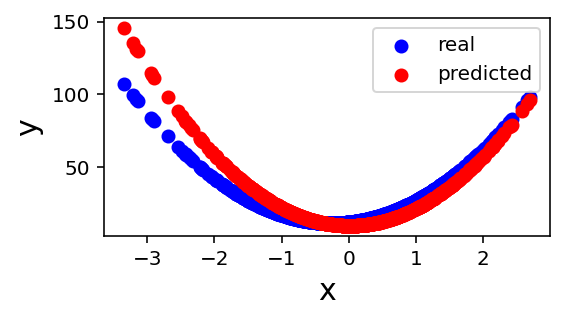

epoch 5 --------> mean squared error 7.2697
Real and predicted values after epoch 5


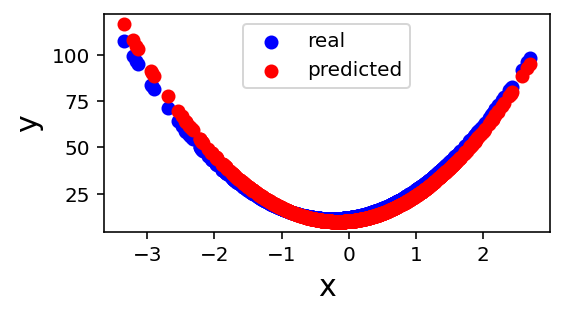

epoch 10 --------> mean squared error 1.7253
Real and predicted values after epoch 10


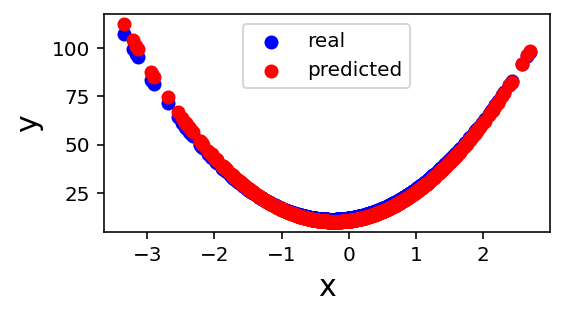

epoch 15 --------> mean squared error 0.6599
Real and predicted values after epoch 15


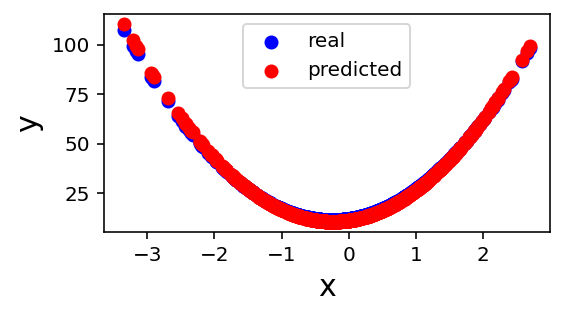

epoch 20 --------> mean squared error 0.315
Real and predicted values after epoch 20


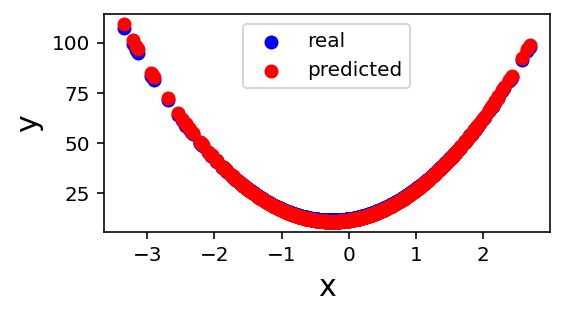

epoch 25 --------> mean squared error 0.16
Real and predicted values after epoch 25


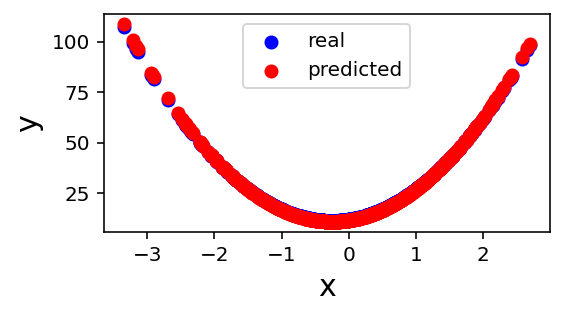

epoch 30 --------> mean squared error 0.0825
Real and predicted values after epoch 30


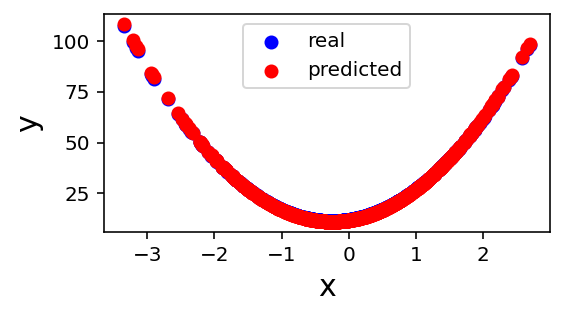

epoch 35 --------> mean squared error 0.0427
Real and predicted values after epoch 35


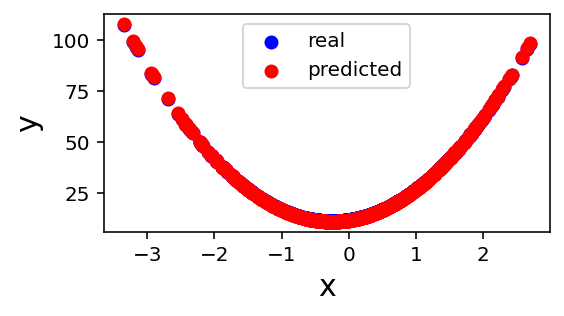

epoch 40 --------> mean squared error 0.0221
Real and predicted values after epoch 40


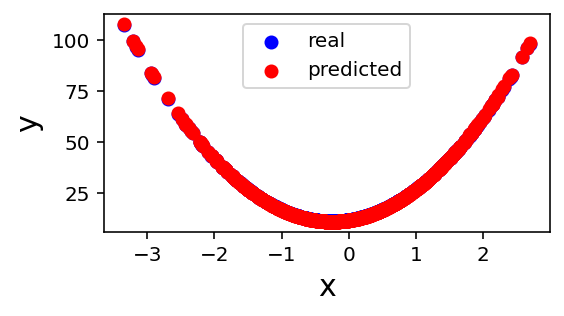

epoch 45 --------> mean squared error 0.0114
Real and predicted values after epoch 45


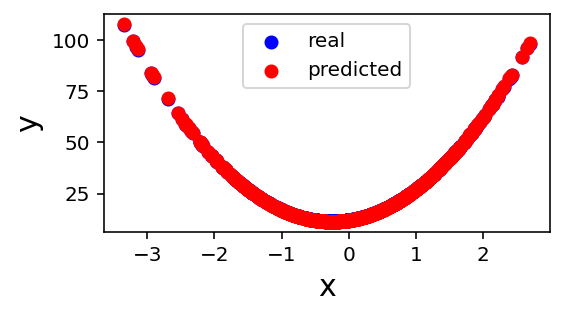

True "a": 10  Learned "a": 10.03
True "a": 5  Learned "a": 5.01
True "a": 12  Learned "a": 11.91


In [424]:
#train the model for 15 epochs

#initialize the model
model = Model()

#number of epochs
epochs = 50

#get a b c and losses
list_a, list_b, list_c = [], [], []
losses = []

#train the model 
for epoch in range(epochs):
    
    list_a.append(model.a)
    list_b.append(model.b)
    list_c.append(model.c)
        
    current_loss = fit(model, x, y, 0.1)
    losses.append(current_loss)
    
    if epoch % 5 == 0:
        
        print('epoch {} --------> mean squared error {}'.format(epoch, np.round(current_loss, 4)))
        print('Real and predicted values after epoch {}'.format(epoch))
        plot_data(x, y, model(x), figsize = (4, 2))
        

#print the final parameter values
print('True "a": {}  Learned "a": {}'.format(true_a, np.round(model.a, 2)))
print('True "a": {}  Learned "a": {}'.format(true_b, np.round(model.b, 2)))
print('True "a": {}  Learned "a": {}'.format(true_c, np.round(model.c, 2)))


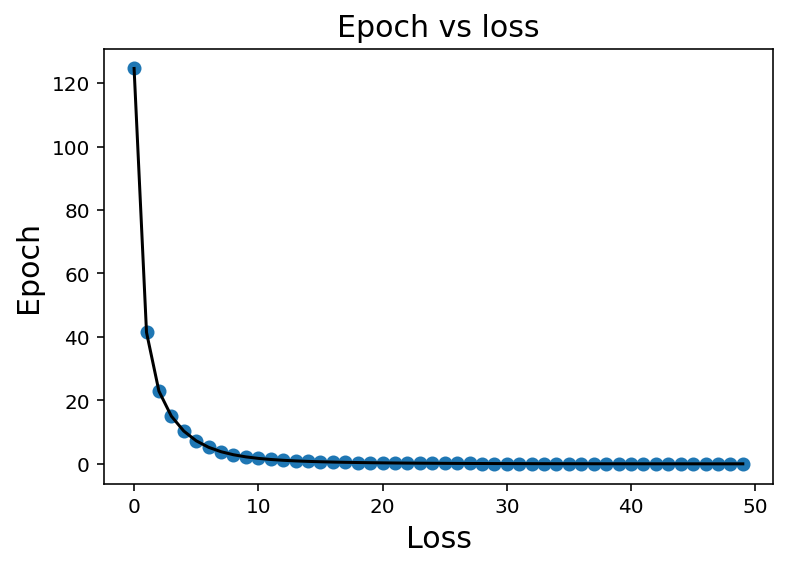

In [425]:
#lets see how the loss is going down with epochs
plt.plot(range(epochs), losses, 'k')
plt.scatter(range(epochs), losses)
plt.title('Epoch vs loss', fontsize = 15)
plt.xlabel('Loss', fontsize = 15)
plt.ylabel('Epoch', fontsize = 15)
plt.show()

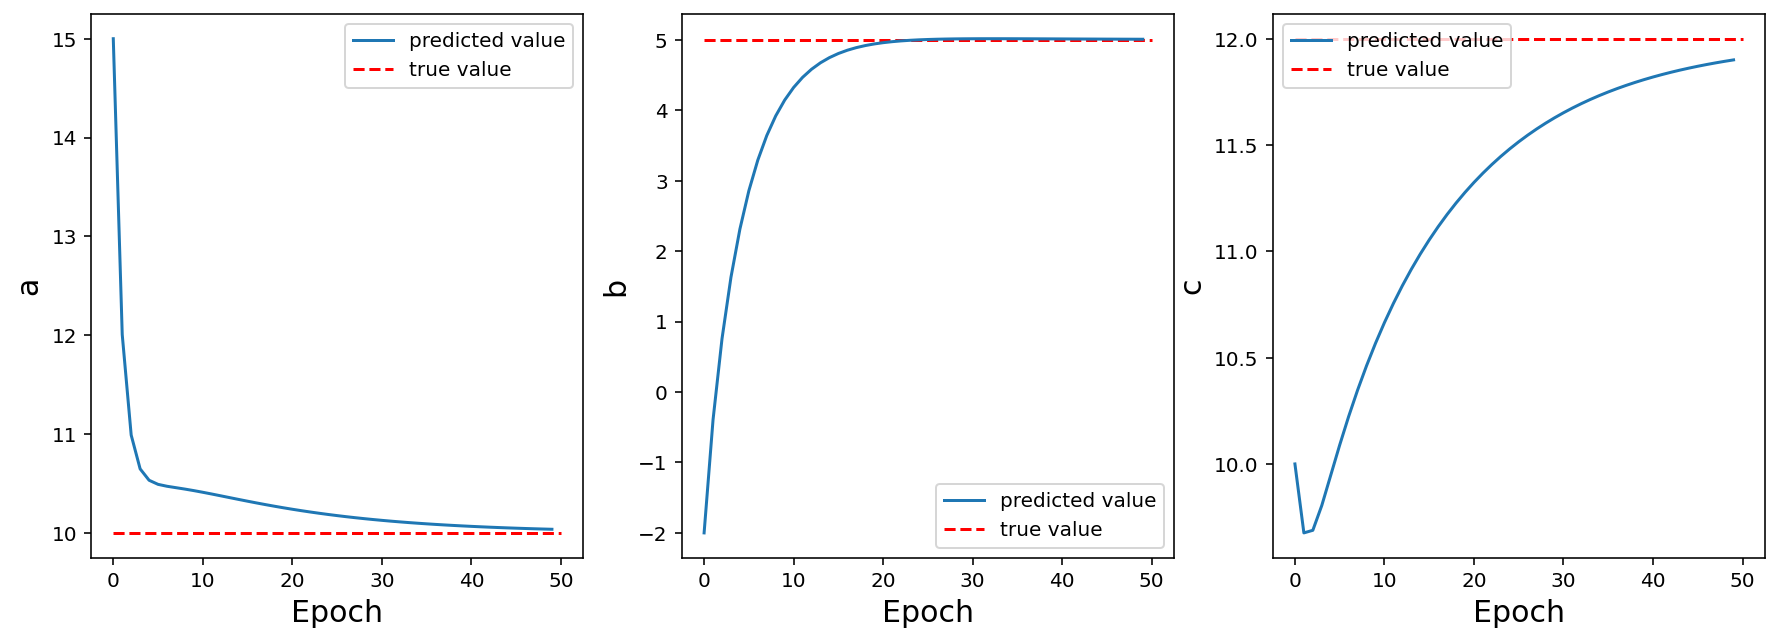

In [426]:
#loss vs parameters
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
i = 0

for lis in [(list_a, true_a, 'a'), (list_b, true_b, 'b'), (list_c, true_c, 'c')]:
    
    ax[i].plot(range(epochs), lis[0])
    ax[i].hlines(lis[1], 0, 50, linestyle = '--', color = 'r')
    ax[i].set_xlabel('Epoch', fontsize = 15)
    ax[i].set_ylabel(lis[2], fontsize = 15)
    ax[i].legend(['predicted value', 'true value'])
    i += 1

In [427]:
#visualizing the loss function and how parameter values change
b_vals = np.linspace(-5, 10, 1000)
c_vals = np.linspace( 3, 20, 1000)

#create meshgrid for b_vals and c_vals we will be plotting only these two vs the loss
b_vals, c_vals = np.meshgrid(b_vals, c_vals)

#create a function to append loss values
loss_vals = np.zeros([1000, 1000])

#initialize the model
model1 = Model()

for i in range(len(a_vals)):
    
    for k in range(len(a_vals)):
        
        model1.a = true_a
        model1.b = b_vals[i][k]
        model1.c = c_vals[i][k]
    
        #calculate loss for that value    
        loss = np.mean(np.square(model1(x) - y))
        loss_vals[i][k] = loss


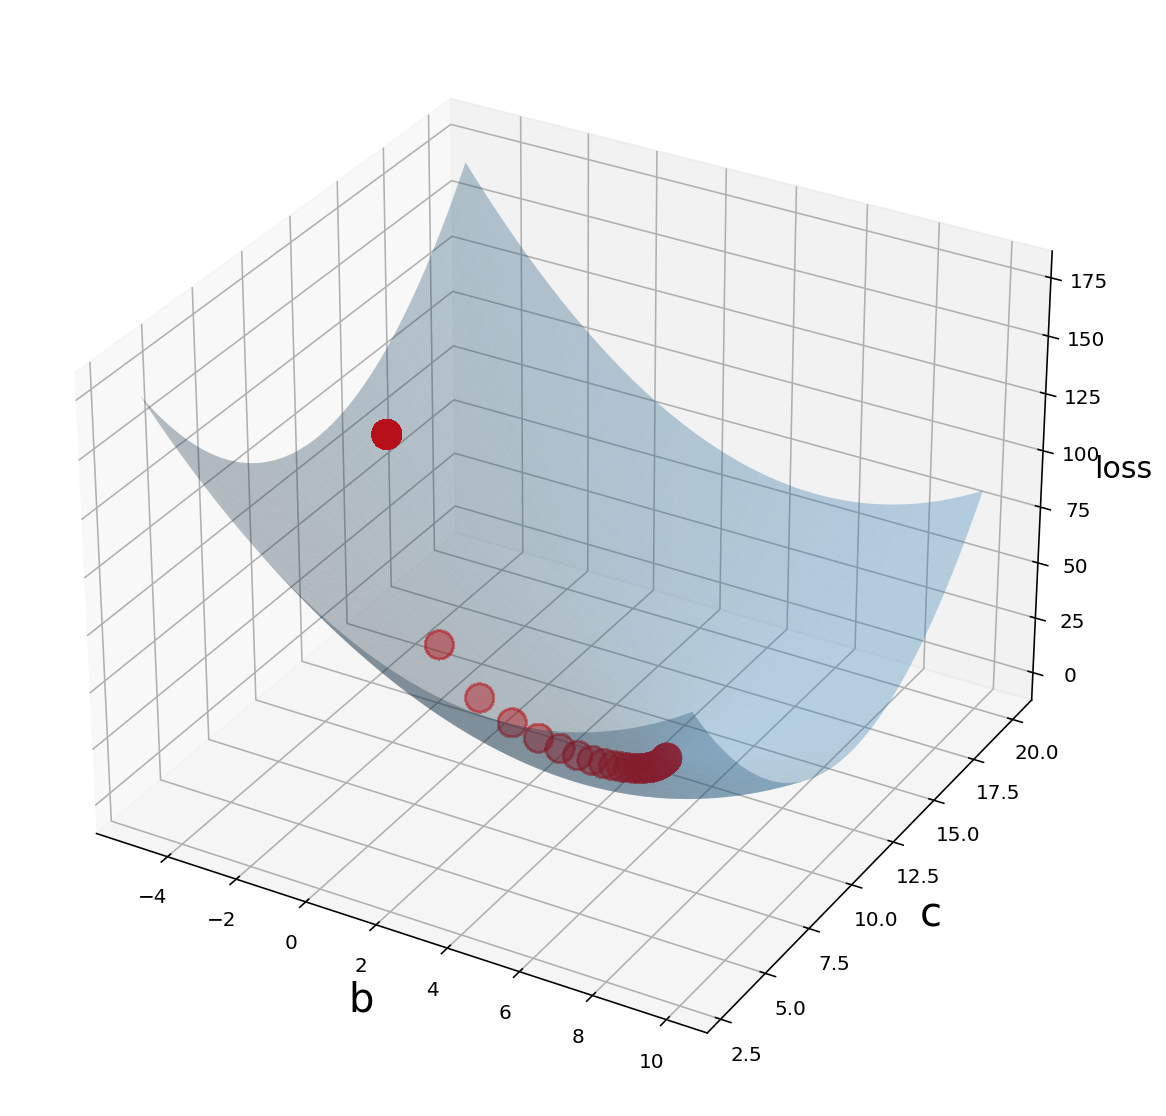

In [428]:
#plot 3d
fig = plt.figure(figsize = (10, 10))
#ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (10, 10))
ax = plt.subplot(111, projection = '3d')

surf = ax.plot_surface(b_vals, c_vals, loss_vals, alpha = 0.3)
ax.set_ylabel('c', fontsize = 20)
ax.set_xlabel('b', fontsize = 20)
ax.set_zlabel('loss', fontsize = 15)
ax.scatter(list_b, list_c, losses, antialiased=False, s = 200, color = 'r')
plt.show()

<a id = 'section2'> </a> <b>Tensorflow Functional API</b>